# Market Basket Analysis - Phase 4

PALLI MUHAMMED SUHAIB,
B.E CSE,
311421104060,
3114 - MEENAKSHI COLLEGE OF ENGINEERING.

This code performs association rule mining on retail transaction data and generates insights.

## Imports

Imports libraries like pandas, matplotlib, numpy and mlxtend for data manipulation, visualization and association rule mining.

## Data Loading and Preprocessing

- Loads raw Excel file into dataframe 
- Handles missing values and filters rows
- Derives columns like SumPrice for additional analysis
- Finds best selling items and total sales by country for initial insights

## Data Transformation 

- Transforms data into transaction format containing lists of items
- One-hot encodes items into binary columns  
- Merges encoded data back into original dataframe

## Association Rule Mining

- Uses mlxtend apriori and association_rules to find frequent itemsets and generate association rules
- Lift is used as the main metric
- Rules are filtered by minimum lift threshold

## Insight Generation

- Top rules sorted by lift are analyzed to uncover associations and patterns 
- Cross-selling opportunities identified from rules with 1 item antecedent and consequent
- Lift values used to determine substitute and complementary products
- Insights displayed and printed for understanding

## Additional Analysis

- Top rules saved to Excel file for further analysis
- Simple explanations added for easier understanding of insights

## Summary

Performs end-to-end association analysis workflow - from data preprocessing to insight generation using retail transaction data.

## Insight Generation from Market Basket Analysis

**Introduction:**
Market Basket Analysis (MBA) is a valuable technique for revealing hidden patterns in transactional data, enabling businesses to understand customer behavior and enhance their strategies. This documentation outlines the insights generated from the code's analysis of transactional data.

**Insight Generation:**

1. **Best Selling Items in Different Countries:**
    - The code identifies the top-selling items in various countries using the `best_selling_items` DataFrame. By knowing which products are most popular in each region, businesses can tailor their marketing strategies and optimize stock levels for these specific items.
    - Analysis of this data can provide insights into why particular products thrive in specific regions, taking into account cultural preferences, trends, or seasonal variations.

2. **Total Sales by Country:**
    - The `total_sales_country` DataFrame summarizes total sales by country. This insight allows businesses to prioritize their marketing efforts in countries that generate the most revenue.
    - The resulting insights can inform strategic decisions regarding market expansion, local campaigns, or potential partnerships with retailers in high-revenue countries.

3. **Most Popular Items in the UK:**
    - The code isolates the data for the United Kingdom using `only_uk`. It provides information about the most popular items in the UK based on the quantity sold.
    - Insights derived from this data can guide inventory optimization and the creation of tailored marketing campaigns for the UK market. Understanding customer preferences can enhance the customer experience.

4. **Items with the Highest Global Revenue:**
    - The `total_sales_item` DataFrame lists products that contribute the most revenue globally. This information includes average prices, total quantities sold, and total revenue generated.
    - These insights are valuable for determining product pricing strategies, optimizing inventory management, and designing marketing campaigns for high-revenue items.

5. **Association Rules:**
    - The code employs the Apriori algorithm to generate association rules based on purchase patterns. These rules reveal relationships between products frequently bought together.
    - Insights from these rules help businesses identify cross-selling opportunities. Understanding item associations and identifying products with high lift (strong associations) can inform strategic bundling or promotions.

6. **Scatter Plot of Association Rules:**
    - The code creates a scatter plot with "lift" and "confidence" values, visually representing the strength of associations between products.
    - The plot enables the identification of rules with high confidence and lift, which are particularly valuable for creating product bundles or promotional campaigns.

7. **Top Association Rules by Lift:**
    - The analysis identifies the top association rules with the highest lift, indicating significant impacts on customer purchasing behavior.
    - These top rules can guide marketing strategies, helping businesses enhance cross-selling efforts and promotional campaigns effectively.

8. **Filtering Rules by Lift Range:**
    - The code filters association rules with lift values between 40 and 50, highlighting strong associations.
    - This filtered subset of rules provides further opportunities for data-driven decisions, such as creating specialized promotions or offering bundled products.

**Conclusion:**
By examining the provided code and its results, businesses can extract valuable insights into customer behavior, identify popular products, and uncover opportunities for enhancing sales and marketing strategies. This documentation serves as a guide to utilizing the code's outputs for informed decision-making.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing the data
data = pd.read_excel("Assignment-1_Data.xlsx")

In [3]:
from matplotlib import pyplot as plt

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [5]:
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [6]:
#Dropping rows where ItemName isn't available
data.dropna(subset=["Itemname"],inplace=True)
#Dropping rows where Quantity <=0
data = data[data["Quantity"]>0]
data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132113
Country            0
dtype: int64

In [7]:
#Fill missing customer IDs
data['CustomerID'].fillna(99999, inplace=True)
#Create SumPrice column
data["SumPrice"]=data["Quantity"]*data["Price"]

In [8]:
#Find the best selling items in each country
best_selling_items = data.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
47,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
25,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4024
20,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
42,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
41,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
43,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639
26,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [9]:
#Find the total sales by country.
total_sales_country = data.groupby(['Country']).agg({'SumPrice': 'sum'}).reset_index()
total_sales_country = total_sales_country.sort_values('SumPrice', ascending=False).reset_index(drop=True)
total_sales_country

,Country,SumPrice
0,United Kingdom,9003097.964
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209715.110
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,57089.900
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


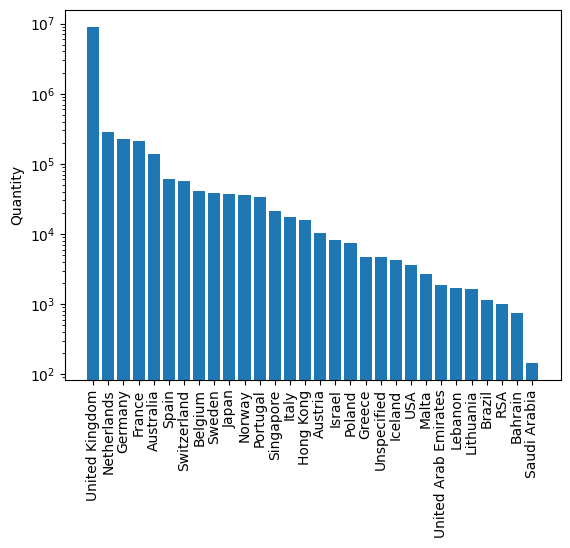

In [10]:
#Visualizing Total sales by country.
plt.bar(total_sales_country["Country"],total_sales_country["SumPrice"])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [11]:
#Isolate the UK data and let's sort the most popular items in UK by quantity sold.
only_uk = data[data["Country"]=="United Kingdom"]
only_uk.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77036
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49526
JUMBO BAG RED RETROSPOT               44268
WHITE HANGING HEART T-LIGHT HOLDER    35744
                                      ...  
HEN HOUSE W CHICK IN NEST                 1
BLACKCHRISTMAS TREE 30CM                  1
GOLD COSMETICS BAG WITH BUTTERFLY         1
WATERING CAN SINGLE HOOK PISTACHIO        1
*Boombox Ipod Classic                     1
Name: Quantity, Length: 4046, dtype: int64

In [12]:
#Let's find out what items, across the globe, bring in the most revenue.
total_sales_item = data.groupby(['Itemname']).agg({'Price': 'mean', 'Quantity': 'sum', 'SumPrice': 'sum'}).reset_index()

# Create a new column with the count of rows for each group
total_sales_item['Count'] = data.groupby(['Itemname']).size().values

# Sort the dataframe by 'SumPrice' column in descending order
total_sales_item = total_sales_item.sort_values("SumPrice", ascending=False)

total_sales_item

,Itemname,Price,Quantity,SumPrice,Count
1060,DOTCOM POSTAGE,291.311822,708,206248.77,708
2386,"PAPER CRAFT , LITTLE BIRDIE",2.080000,80995,168469.60,1
2848,REGENCY CAKESTAND 3 TIER,14.043347,13119,165689.19,1930
3840,WHITE HANGING HEART T-LIGHT HOLDER,3.220569,36527,102588.37,2269
2411,PARTY BUNTING,5.808664,17812,97367.48,1677
...,...,...,...,...,...
4025,allocate stock for dotcom orders ta,0.000000,4,0.00,1
4026,amazon,0.000000,161,0.00,8
4027,amazon adjust,0.000000,10,0.00,1
4028,amazon sales,0.000000,20,0.00,1


In [13]:
#Convert the dataset into transactional format
transactions = data.groupby(['BillNo'])['Itemname'].apply(list)
transactions

BillNo
536365     [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366     [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367     [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368     [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                            [BATH BUILDING BLOCK WORD]
                                 ...                        
581586     [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
581587     [CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...
A563185                                    [Adjust bad debt]
A563186                                    [Adjust bad debt]
A563187                                    [Adjust bad debt]
Name: Itemname, Length: 19735, dtype: object

In [14]:
#Create a one-hot matrix of the products
one_hot = pd.get_dummies(data['Itemname'])
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Add the BillNo column back to the one-hot encoded matrix
one_hot['BillNo']=data['BillNo']
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode,BillNo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587


In [16]:
#Now, we group the One-Hot Matrix by BillNo and sum the values
one_hot = one_hot.groupby('BillNo').sum()
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Now, we merge the one-hot encoded matrix, with the transactional data
transaction_matrix = pd.merge(transactions, one_hot, on='BillNo')
transaction_matrix

,Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,[Adjust bad debt],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
 #Now we have to convert the product columns to 0s and 1s. We are converting sum values to binary as number doesn't matter
transaction_matrix[one_hot.columns[:-1]] = (transaction_matrix[one_hot.columns[:-1]] >= 1).astype(int)
transaction_matrix

,Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,[Adjust bad debt],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
print(transaction_matrix.dtypes)

Itemname                        object
*Boombox Ipod Classic            int32
*USB Office Mirror Ball          int32
10 COLOUR SPACEBOY PEN           int32
12 COLOURED PARTY BALLOONS       int32
                                 ...  
wrongly coded 20713              int32
wrongly coded 23343              int32
wrongly marked                   int32
wrongly marked 23343             int32
wrongly sold (22719) barcode     uint8
Length: 4057, dtype: object


In [21]:
transaction_matrix.iloc[:, 1:] = transaction_matrix.iloc[:, 1:].astype(bool)
#Perform frequent itemset mining
frequent_itemsets = apriori(transaction_matrix.iloc[:, 1:], min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.015809,(10 COLOUR SPACEBOY PEN)
1,0.012567,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.017887,(12 PENCIL SMALL TUBE WOODLAND)
3,0.018242,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.017887,(12 PENCILS SMALL TUBE SKULL)
...,...,...
1891,0.011249,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU..."
1892,0.011249,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,..."
1893,0.010388,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,..."
1894,0.010286,"(LUNCH BAG SUKI DESIGN, LUNCH BAG PINK POLKADO..."


In [22]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOTCOM POSTAGE),(6 RIBBONS RUSTIC CHARM),0.035875,0.047732,0.010236,0.285311,5.977290,0.008523,1.332422,0.863685
1,(6 RIBBONS RUSTIC CHARM),(DOTCOM POSTAGE),0.047732,0.035875,0.010236,0.214437,5.977290,0.008523,1.227305,0.874439
2,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.047732,0.056549,0.011806,0.247346,4.373992,0.009107,1.253499,0.810041
3,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.056549,0.047732,0.011806,0.208781,4.373992,0.009107,1.203545,0.817611
4,(JAM MAKING SET WITH JARS),(6 RIBBONS RUSTIC CHARM),0.055181,0.047732,0.010337,0.187328,3.924538,0.007703,1.171773,0.788715
...,...,...,...,...,...,...,...,...,...,...
3337,(STRAWBERRY CHARLOTTE BAG),"(RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...",0.036281,0.012668,0.010286,0.283520,22.381034,0.009827,1.378031,0.991284
3338,(CHARLOTTE BAG PINK POLKADOT),"(STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...",0.037395,0.013073,0.010286,0.275068,21.040551,0.009797,1.361406,0.989475
3339,(CHARLOTTE BAG SUKI DESIGN),"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...",0.044337,0.012212,0.010286,0.232000,18.998008,0.009745,1.286183,0.991315
3340,(WOODLAND CHARLOTTE BAG),"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...",0.041905,0.012364,0.010286,0.245466,19.853534,0.009768,1.308934,0.991166


In [23]:
#Let's see the top 10 rules by lift
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2076,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010641,0.011806,0.010134,0.952381,80.666258,0.010009,20.752065,0.998225
2081,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011806,0.010641,0.010134,0.858369,80.666258,0.010009,6.985474,0.999403
2077,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010641,0.011857,0.010134,0.952381,80.321530,0.010008,20.751001,0.998172
2080,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER THYME)",0.011857,0.010641,0.010134,0.854701,80.321530,0.010008,6.809118,0.999400
535,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011806,0.011857,0.010996,0.931330,78.546183,0.010856,14.389831,0.999064
534,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011857,0.011806,0.010996,0.927350,78.546183,0.010856,13.602194,0.999115
2078,"(HERB MARKER ROSEMARY, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.010996,0.011756,0.010134,0.921659,78.400604,0.010005,12.614647,0.998221
2079,(HERB MARKER PARSLEY),"(HERB MARKER ROSEMARY, HERB MARKER THYME)",0.011756,0.010996,0.010134,0.862069,78.400604,0.010005,7.170281,0.998989
533,(HERB MARKER THYME),(HERB MARKER PARSLEY),0.011806,0.011756,0.010641,0.901288,76.667715,0.010502,10.011344,0.998748
532,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.011756,0.011806,0.010641,0.905172,76.667715,0.010502,10.420950,0.998697


In [24]:
import mpld3

# create scatter plot with x and y as lift and confidence values
fig, ax = plt.subplots()
scatter = ax.scatter(rules['lift'], rules['confidence'], alpha=0.5)

# Define tooltips
tooltips = []
for i in range(len(rules)):
    rule = rules.iloc[i]
    tooltip = f"Rule: {rule['antecedents']} -> {rule['consequents']}\nSupport: {rule['support']:.3f}\nConfidence: {rule['confidence']:.3f}\nLift: {rule['lift']:.3f}"
    tooltips.append(tooltip)

# Add tooltips to scatter plot using mpld3
mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(scatter, tooltips))

# Set axis labels and title
ax.set_xlabel("Lift")
ax.set_ylabel("Confidence")
ax.set_title("Association Rules Scatter Plot")

# Show the plot
mpld3.display()

In [25]:
rules[(rules['lift'] > 40) & (rules['lift'] < 50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
124,(PINK POLKADOT CUP),(BLUE POLKADOT CUP),0.015505,0.016418,0.010489,0.676471,41.204158,0.010234,3.040164,0.991098
125,(BLUE POLKADOT CUP),(PINK POLKADOT CUP),0.016418,0.015505,0.010489,0.638889,41.204158,0.010234,2.726293,0.992017
264,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.014441,0.017938,0.010996,0.761404,42.447170,0.010737,4.115997,0.990749
265,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.017938,0.014441,0.010996,0.612994,42.447170,0.010737,2.546626,0.994276
552,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.015100,0.016874,0.011198,0.741611,43.951015,0.010944,3.804827,0.992230
553,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.016874,0.015100,0.011198,0.663664,43.951015,0.010944,2.928319,0.994020
1556,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.014897,0.015252,0.011148,0.748299,49.062083,0.010920,3.912377,0.994432
1557,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.015252,0.014897,0.011148,0.730897,49.062083,0.010920,3.660690,0.994790
1568,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE PINK),0.021079,0.014289,0.012617,0.598558,41.888426,0.012316,2.455423,0.997146
1569,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES),0.014289,0.021079,0.012617,0.882979,41.888426,0.012316,8.365322,0.990277


In [26]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
top_lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2076,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010641,0.011806,0.010134,0.952381,80.666258,0.010009,20.752065,0.998225
2081,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011806,0.010641,0.010134,0.858369,80.666258,0.010009,6.985474,0.999403
2077,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010641,0.011857,0.010134,0.952381,80.321530,0.010008,20.751001,0.998172
2080,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER THYME)",0.011857,0.010641,0.010134,0.854701,80.321530,0.010008,6.809118,0.999400
535,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011806,0.011857,0.010996,0.931330,78.546183,0.010856,14.389831,0.999064
534,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011857,0.011806,0.010996,0.927350,78.546183,0.010856,13.602194,0.999115
2078,"(HERB MARKER ROSEMARY, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.010996,0.011756,0.010134,0.921659,78.400604,0.010005,12.614647,0.998221
2079,(HERB MARKER PARSLEY),"(HERB MARKER ROSEMARY, HERB MARKER THYME)",0.011756,0.010996,0.010134,0.862069,78.400604,0.010005,7.170281,0.998989
533,(HERB MARKER THYME),(HERB MARKER PARSLEY),0.011806,0.011756,0.010641,0.901288,76.667715,0.010502,10.011344,0.998748
532,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.011756,0.011806,0.010641,0.905172,76.667715,0.010502,10.420950,0.998697


In [27]:
frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets
772,0.111578,(WHITE HANGING HEART T-LIGHT HOLDER)
342,0.104586,(JUMBO BAG RED RETROSPOT)
552,0.096478,(REGENCY CAKESTAND 3 TIER)
460,0.083912,(PARTY BUNTING)
382,0.078085,(LUNCH BAG RED RETROSPOT)
49,0.072511,(ASSORTED COLOUR BIRD ORNAMENT)
620,0.068204,(SET OF 3 CAKE TINS PANTRY DESIGN)
439,0.064809,(PACK OF 72 RETROSPOT CAKE CASES)
374,0.063846,(LUNCH BAG BLACK SKULL.)
413,0.062427,(NATURAL SLATE HEART CHALKBOARD)


In [28]:
top_rules = rules[rules['lift'] > 5]
print(top_rules[['antecedents','consequents','lift','confidence']])

                               antecedents  \
0                         (DOTCOM POSTAGE)   
1                 (6 RIBBONS RUSTIC CHARM)   
14             (SCANDINAVIAN REDS RIBBONS)   
15                (6 RIBBONS RUSTIC CHARM)   
20    (PACK OF 60 PINK PAISLEY CAKE CASES)   
...                                    ...   
3337            (STRAWBERRY CHARLOTTE BAG)   
3338         (CHARLOTTE BAG PINK POLKADOT)   
3339           (CHARLOTTE BAG SUKI DESIGN)   
3340              (WOODLAND CHARLOTTE BAG)   
3341         (RED RETROSPOT CHARLOTTE BAG)   

                                            consequents       lift  confidence  
0                              (6 RIBBONS RUSTIC CHARM)   5.977290    0.285311  
1                                      (DOTCOM POSTAGE)   5.977290    0.214437  
14                             (6 RIBBONS RUSTIC CHARM)   9.980725    0.476404  
15                          (SCANDINAVIAN REDS RIBBONS)   9.980725    0.225053  
20                    (60 CAKE CASES DOLLY

In [29]:
cross_sell = rules[(rules['antecedents'].apply(len)==1) & 
                   (rules['consequents'].apply(len)==1)]

for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

frozenset({'DOTCOM POSTAGE'}) -> frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'6 RIBBONS RUSTIC CHARM'}) -> frozenset({'DOTCOM POSTAGE'})
frozenset({'6 RIBBONS RUSTIC CHARM'}) -> frozenset({'JAM MAKING SET PRINTED'})
frozenset({'JAM MAKING SET PRINTED'}) -> frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'JAM MAKING SET WITH JARS'}) -> frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'6 RIBBONS RUSTIC CHARM'}) -> frozenset({'JAM MAKING SET WITH JARS'})
frozenset({'JUMBO BAG RED RETROSPOT'}) -> frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'6 RIBBONS RUSTIC CHARM'}) -> frozenset({'JUMBO BAG RED RETROSPOT'})
frozenset({'6 RIBBONS RUSTIC CHARM'}) -> frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}) -> frozenset({'6 RIBBONS RUSTIC CHARM'})


In [30]:
substitutes = rules[rules['lift'] < 1] 
complements = rules[rules['lift'] > 1]

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Substitutes: Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Complements:                   antecedents               consequents  antecedent support  \
0            (DOTCOM POSTAGE)  (6 RIBBONS RUSTIC CHARM)            0.035875   
1    (6 RIBBONS RUSTIC CHARM)          (DOTCOM POSTAGE)            0.047732   
2    (6 RIBBONS RUSTIC CHARM)  (JAM MAKING SET PRINTED)            0.047732   
3    (JAM MAKING SET PRINTED)  (6 RIBBONS RUSTIC CHARM)            0.056549   
4  (JAM MAKING SET WITH JARS)  (6 RIBBONS RUSTIC CHARM)            0.055181   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.047732  0.010236    0.285311  5.977290  0.008523    1.332422   
1            0.035875  0.010236    0.214437  5.977290  0.008523    1.227305   
2            0.056549  0.011806    0.247346  4.373992  0.009107    1.253499   
3            0.04

In [31]:
# Imports and data loading

# Association rule mining 

# Additional Analysis

# Display top 10 rules by lift  
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
print(top_lift_rules)

# Frequent itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10) 

# Filter and summarize top rules
top_rules = rules[rules['lift'] > 5]  
print(top_rules[['antecedents','consequents','lift','confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len)==1) &  
                   (rules['consequents'].apply(len)==1)]
                   
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))
    
# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]  

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

# Visualization and filtering

# Recommendations

                                      antecedents  \
2076  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)   
2081                          (HERB MARKER THYME)   
2077     (HERB MARKER PARSLEY, HERB MARKER THYME)   
2080                       (HERB MARKER ROSEMARY)   
535                           (HERB MARKER THYME)   
534                        (HERB MARKER ROSEMARY)   
2078    (HERB MARKER ROSEMARY, HERB MARKER THYME)   
2079                        (HERB MARKER PARSLEY)   
533                           (HERB MARKER THYME)   
532                         (HERB MARKER PARSLEY)   

                                      consequents  antecedent support  \
2076                          (HERB MARKER THYME)            0.010641   
2081  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)            0.011806   
2077                       (HERB MARKER ROSEMARY)            0.010641   
2080     (HERB MARKER PARSLEY, HERB MARKER THYME)            0.011857   
535                        (HERB MARKER ROSEMARY)  

In [32]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10000)

# Create a DataFrame to store insights
insights_df = top_lift_rules[['antecedents', 'consequents', 'lift', 'confidence']]

# Display and print the top 10 rules
print("Top 10 Rules by Lift:")
print(insights_df)

# Save insights to a CSV file
insights_df.to_csv("association_rules_insights.xlsx", index=True)

# Additional Insights
frequent_itemsets.sort_values('support', ascending=False).head(10)  # Display top frequent itemsets
top_rules = rules[rules['lift'] > 5]  # Filter and summarize top rules
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]
print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Top 10 Rules by Lift:
                                      antecedents  \
2076  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)   
2081                          (HERB MARKER THYME)   
2077     (HERB MARKER PARSLEY, HERB MARKER THYME)   
2080                       (HERB MARKER ROSEMARY)   
535                           (HERB MARKER THYME)   
...                                           ...   
1553                   (REGENCY CAKESTAND 3 TIER)   
1422             (PAPER CHAIN KIT 50'S CHRISTMAS)   
1423         (WHITE HANGING HEART T-LIGHT HOLDER)   
904                     (JUMBO BAG RED RETROSPOT)   
905                    (REGENCY CAKESTAND 3 TIER)   

                                      consequents       lift  confidence  
2076                          (HERB MARKER THYME)  80.666258    0.952381  
2081  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)  80.666258    0.858369  
2077                       (HERB MARKER ROSEMARY)  80.321530    0.952381  
2080     (HERB MARKER PARSLEY, HERB MARKE